# DATA PREPARATION

1.1 Sumber Data

Dataset berasal dari proyek Tidytuesday dan dapat diakses melalui GitHub. Data dapat diakses pada link berikut: https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-01-21/spotify_songs.csv

1.2 Spotify Data Set

  - Tujuan Data
  
  Tujuan awal dari data ini adalah untuk mengeksplorasi dan mengklasifikasikan lagu berdasarkan fitur audio yang disediakan oleh Spotify. Data ini diambil menggunakan paket spotifyr, yang memungkinkan pengambilan metadata dan informasi audio dari lagu-lagu Spotify.

  - Pengumpulan Data
  
  Data ini dikumpulkan dari Spotify API, dan dataset ini merupakan bagian dari proyek Tidytuesday yang dirilis pada 21 Januari 2020.
  Terdapat sekitar 16.000 lagu dengan beberapa variabel yang menggambarkan karakteristik audio lagu, seperti danceability, energy, valence, dan genre.

  - Variabel

  Dataset ini memiliki 23 variabel, termasuk nama lagu, nama artis, genre, popularitas lagu, serta berbagai fitur audio (misalnya: danceability, energy, tempo, loudness).
  Beberapa kolom yang ada antara lain: track_name, artist_name, track_id, album_name, dan fitur audio lainnya.

# IMPORT LIBRARY

In [ ]:
import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

warnings.filterwarnings('ignore')

# GATHERING DATA

- load file csv

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2020/2020-01-21/spotify_songs.csv')

In [ ]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


- Data information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

| **Variabel**              | **DType**   | **Deskripsi**                                                                                                                                                 |
|---------------------------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **track_id**              | karakter    | ID unik lagu                                                                                                                                                  |
| **track_name**            | karakter    | Nama lagu                                                                                                                                                     |
| **track_artist**          | karakter    | Artis lagu                                                                                                                                                    |
| **track_popularity**      | integer     | Popularitas lagu (0-100), semakin tinggi nilainya, semakin populer lagu tersebut.                                                                             |
| **track_album_id**        | karakter    | ID unik album                                                                                                                                                 |
| **track_album_name**      | karakter    | Nama album lagu                                                                                                                                               |
| **track_album_release_date** | karakter | Tanggal rilis album                                                                                                                                           |
| **playlist_name**         | karakter    | Nama playlist                                                                                                                                                 |
| **playlist_id**           | karakter    | ID playlist                                                                                                                                                   |
| **playlist_genre**        | karakter    | Genre playlist                                                                                                                                                |
| **playlist_subgenre**     | karakter    | Subgenre playlist                                                                                                                                             |
| **danceability**          | float       | Mengukur kecocokan lagu untuk menari berdasarkan elemen musik seperti tempo, ritme, dan kekuatan ketukan (nilai 0.0 = tidak cocok, 1.0 = sangat cocok).         |
| **energy**                | float       | Menggambarkan intensitas dan aktivitas lagu (nilai tinggi = lagu intens seperti metal, nilai rendah = lagu tenang seperti musik klasik).                       |
| **key**                   | integer     | Kunci umum lagu (0 = C, 1 = C♯/D♭, 2 = D, dst).                                                                                                               |
| **loudness**              | float       | Tingkat kerasnya lagu dalam desibel (dB), dengan rentang antara -60 hingga 0 dB.                                                                              |
| **mode**                  | integer     | Mode skala lagu (1 = mayor, 0 = minor).                                                                                                                       |
| **speechiness**           | float       | Mengukur kehadiran kata-kata yang diucapkan (nilai 1.0 = banyak berbicara, seperti talk show atau buku audio).                                                 |
| **acousticness**          | float       | Kepercayaan apakah lagu bersifat akustik (0.0 = tidak akustik, 1.0 = sangat akustik).                                                                          |
| **instrumentalness**      | float       | Memprediksi apakah lagu tidak mengandung vokal (nilai >0.5 = lagu instrumental).                                                                               |
| **liveness**              | float       | Mengukur kehadiran audiens dalam rekaman (nilai >0.8 = kemungkinan rekaman langsung).                                                                          |
| **valence**               | float       | Mengukur sejauh mana lagu menyampaikan perasaan positif (nilai tinggi = ceria, nilai rendah = murung).                                                         |
| **tempo**                 | float       | Tempo lagu dalam ketukan per menit (BPM).                                                                                                                     |
| **duration_ms**           | integer     | Durasi lagu dalam milidetik.                                                                                                                                  |


# ASSESING DATA

In [ ]:
# chek apakah terdapat null value
df.isnull().sum()

,0
track_id,0
track_name,5
track_artist,5
track_popularity,0
track_album_id,0
track_album_name,5
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [ ]:
df[df['track_name'].isnull()]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [ ]:
df[df['track_artist'].isnull()]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [ ]:
df[df['track_album_name'].isnull()]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [ ]:
# check apakah terdapat duplikasi data
print(f'Jumlah duplikasi: {df.duplicated().sum()}' )

Jumlah duplikasi: 0


In [ ]:
#shape of the dataset
df.shape

(32833, 23)

In [ ]:
# Description of the Data
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
# Fungsi untuk mencari value yang hanya bernilai angka pada kolom track_artist
def find_numeric_track_name(df):
    """
    Searches for track names that only consist of numeric values in the 'track_name' column.

    Inputs:
        df -- Pandas DataFrame containing a 'track_name' column to analyze.

    Outputs:
        numeric_albums -- DataFrame with rows where 'track_name' values are numeric-only.

    Steps:
        1. Drops rows with NaN values in the 'track_name' column.
        2. Filters rows where the 'track_name' contains only numeric characters (using regex ^\\d+$).
        3. Returns the filtered DataFrame.
    """
    df_cleaned = df.dropna(subset=['track_name'])
    numeric_albums = df_cleaned[df_cleaned['track_name'].str.match(r'^\d+$')]
    return numeric_albums

numeric_track_name = find_numeric_track_name(df)
numeric_track_name

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
606,15DwFznkBJir7AK9PyMyRR,17,MK,69,0K1826JxL1dViQBsEKApN5,17,2017-09-01,Dance Pop Tunes,4SdfG4cPG3skmTiQLozZGh,pop,...,0,-7.202,0,0.0689,0.001490,0.12700,0.0696,0.667,122.029,196489
1101,5UVBumEwdUnzvqxrXOYLFA,17,Youth Lagoon,58,7jG32gfkuo10qarPgmWC7q,The Year of Hibernation,2011,Ultimate Indie Presents... Best Indie Tracks o...,37i9dQZF1DWTHM4kX49UKs,pop,...,0,-8.531,1,0.0516,0.835000,0.65400,0.1290,0.120,74.517,236000
1711,4UuHWIkAWnN176A2rx7YFB,1985,Bowling For Soup,59,7JST4gPYSXFegyuk9nKFb0,A Hangover You Don't Deserve,2004-09-11,Pop Punk | Post-Hardcore,1YgWQAs1s77NzieIH4ARKn,pop,...,4,-4.422,1,0.0665,0.000246,0.00000,0.3370,0.853,119.955,193000
1785,2BgEsaKNfHUdlh97KmvFyo,2002,Anne-Marie,83,7lPoGKpCGgdKFAxpudhAH5,Speak Your Mind (Deluxe),2018-04-27,Intro to Post-Teen Pop,6o6MNYZqHSkMAKcCHPNu7K,pop,...,1,-2.881,0,0.1170,0.037200,0.00000,0.1370,0.603,96.133,186987
1811,1mQRQlbf1nXbazPEuSyij8,22,Taylor Swift,0,092fm0yKd9V4VGi6G3u51Y,22,2012-01-01,🤩🤪Post Teen Pop🤪🤩,6IT8LGpwLw3Pt2XnVUBN7j,pop,...,7,-6.548,1,0.0373,0.002880,0.00133,0.0631,0.676,104.011,231867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27533,7pAC4ebO3MVIMAROkUrEyN,911,Saint Punk,37,6mgsIfswb8UvNaFZLbYrIk,911,2019-12-06,ELECTRO HOUSE 2020,1N5dPU0Ca9N9AwBbUeyzX5,edm,...,8,-2.416,0,0.1490,0.005340,0.00592,0.3090,0.402,125.032,201577
27624,15DwFznkBJir7AK9PyMyRR,17,MK,69,0K1826JxL1dViQBsEKApN5,17,2017-09-01,New House ‍,54XvQQsViMBwjO1ws2o2wx,edm,...,0,-7.202,0,0.0689,0.001490,0.12700,0.0696,0.667,122.029,196489
28322,7pAC4ebO3MVIMAROkUrEyN,911,Saint Punk,37,6mgsIfswb8UvNaFZLbYrIk,911,2019-12-06,Big Room EDM,3S03NWbWkrR1e7DPH9rf9Z,edm,...,8,-2.416,0,0.1490,0.005340,0.00592,0.3090,0.402,125.032,201577
30461,2BgEsaKNfHUdlh97KmvFyo,2002,Anne-Marie,83,7lPoGKpCGgdKFAxpudhAH5,Speak Your Mind (Deluxe),2018-04-27,2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016...,2DjIfVDXGYDgRxw7IJTKVb,edm,...,1,-2.881,0,0.1170,0.037200,0.00000,0.1370,0.603,96.133,186987


In [ ]:
# Fungsi untuk mencari value yang hanya bernilai angka pada kolom track_album_name
def find_numeric_album_names(df):
    """
    Searches for album names that only consist of numeric values in the 'track_album_name' column.

    Inputs:
        df -- Pandas DataFrame containing a 'track_album_name' column to analyze.

    Outputs:
        numeric_albums -- DataFrame with rows where 'track_album_name' values are numeric-only.

    Steps:
        1. Drops rows with NaN values in the 'track_album_name' column.
        2. Filters rows where the 'track_album_name' contains only numeric characters (using regex ^\\d+$).
        3. Returns the filtered DataFrame containing rows with numeric album names.
    """
    df_cleaned = df.dropna(subset=['track_album_name'])
    numeric_albums = df_cleaned[df_cleaned['track_album_name'].str.match(r'^\d+$')]
    return numeric_albums

numeric_album_names = find_numeric_album_names(df)
numeric_album_names

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
153,3tTYxjYYcXFqFXA0AZ1Fav,Flames,David Guetta,57,2Sq9AIsIrad2GygwB6QLPt,7,2018-09-14,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,5,-4.346,0,0.0414,0.072300,0.000008,0.0895,0.3620,93.958,195000
386,1QNoGbedAra3cbGcQAwBRQ,Now & Forever (feat. SONPUB & 向井太一),香取慎吾,38,4mO9wZ0nT0IU6IZqY1b0dg,20200101,2020-01-01,Dance Pop: Japan,37i9dQZF1DXahYFr91pFvG,pop,...,5,-7.180,1,0.0473,0.287000,0.000491,0.0449,0.5550,105.014,215140
590,0YammaEkYSeo9vQYZ1OwS6,Say My Name,David Guetta,78,5rbJtzuXtpIP0Ykk7ewIit,7,2018-09-14,Dance Pop Tunes,4SdfG4cPG3skmTiQLozZGh,pop,...,10,-5.119,0,0.1230,0.137000,0.000000,0.1920,0.7900,95.031,198947
606,15DwFznkBJir7AK9PyMyRR,17,MK,69,0K1826JxL1dViQBsEKApN5,17,2017-09-01,Dance Pop Tunes,4SdfG4cPG3skmTiQLozZGh,pop,...,0,-7.202,0,0.0689,0.001490,0.127000,0.0696,0.6670,122.029,196489
1043,47PRHkkBim9N2vdhJHoYel,Ooo!,EXILE SHOKICHI,29,2VH4MDTOOs9IswirGyVPGe,1114,2019-05-15,Best of 2019 Dance Pop: Japan,37i9dQZF1DXdOtZGKonFlM,pop,...,0,-5.797,1,0.1810,0.632000,0.000000,0.0934,0.6150,123.133,180773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30696,5xTtaWoae3wi06K5WfVUUH,Shake It Off,Taylor Swift,68,2QJmrSgbdM35R67eoGQo4j,1989,2014-10-27,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,...,7,-5.414,1,0.1650,0.056100,0.000000,0.1480,0.9430,160.020,219200
31193,1TcNWttaet1eKCwl2p6Qae,Freedom,David Guetta,38,5rbJtzuXtpIP0Ykk7ewIit,7,2018-09-14,Selected House,2JPzPB9jnvJLAYtmCbvZy8,edm,...,7,-7.173,1,0.0962,0.002660,0.370000,0.1220,0.0616,116.497,235160
31706,041RKnQpbVpDuSRtg231un,005A1,Apparel Wax,34,1lh2D2mZhuhZvsKOv4ZF3F,5,2018-10-08,House/Electro/Progressive/Disco/Lofi/Synthwave,42jbIN5Zj0UUPdtmqxQRKF,edm,...,6,-7.994,1,0.0565,0.096000,0.246000,0.0623,0.8870,124.003,347187
32637,572GZR0RxFrZjpPXokLvXW,Brother,Urbano,2,2c6czRDNzZWgfHcVGBUHvc,23,2016-12-05,Underground Party | Hypnotic | Minimal | Acid ...,29jj7pQlDqnWclbHQk21Rq,edm,...,6,-9.404,0,0.0587,0.000099,0.863000,0.1110,0.1360,127.996,379967


In [ ]:
# Fungsi untuk mencari value yang hanya bernilai angka pada kolom track_artist
def find_numeric_track_artist(df):
    """
    Searches for artist names that only consist of numeric values in the 'track_artist' column.

    Inputs:
        df -- Pandas DataFrame containing a 'track_artist' column to analyze.

    Outputs:
        numeric_artists -- DataFrame with rows where 'track_artist' values are numeric-only.

    Steps:
        1. Drops rows with NaN values in the 'track_artist' column.
        2. Filters rows where the 'track_artist' contains only numeric characters (using regex ^\\d+$).
        3. Returns the filtered DataFrame containing rows with numeric artist names.
    """

    df_cleaned = df.dropna(subset=['track_artist'])
    numeric_albums = df_cleaned[df_cleaned['track_artist'].str.match(r'^\d+$')]
    return numeric_albums

numeric_track_artist = find_numeric_track_artist(df)
numeric_track_artist

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
9655,7o7rrKyfqGo5xw318JNFUb,Only You (feat. Notorious B.I.G. and Mase) - G...,112,44,006AgHXrEw13oyg0D8evRa,Bad Boy Greatest Hits Vol. 1,1998,90s Gangsta Rap / Top Hip-hop Classics,0C2zyPdlkbWHrwVg9gqNdU,rap,...,8,-6.392,1,0.0508,0.01620,0.000000,0.0569,0.779,95.952,290040
21395,1BtFqF8pw7OEFCHjvKUcx7,Red Eye,7715,40,58aORwfB0g5tEoKyOpwPsg,Red Eye,2019-12-13,New Hip Hop‏‏​​ ‍,5WNUX6jisX0NRlVDTm6RDd,r&b,...,1,-4.755,1,0.1030,0.29800,0.000000,0.1010,0.658,131.911,154709
21820,4VSyH8AkIt3kaR5xIPFVVi,Where My Girls At,702,58,6PELMehRtCwGXXyFS0fLKR,702,1999-01-01,The Sound of Urban Contemporary,07zF8MjQPsiYUXiAIGZ5TA,r&b,...,4,-7.435,1,0.0505,0.03480,0.016300,0.1940,0.761,92.183,166693
21828,2SLZ2rX5773RS16mcqBxG7,Peaches and Cream,112,66,6QlbqTqKJt1UnuH3PLz9mb,Part III,2001,The Sound of Urban Contemporary,07zF8MjQPsiYUXiAIGZ5TA,r&b,...,4,-6.255,0,0.3340,0.00277,0.000000,0.0532,0.768,203.862,193093
22787,3HQ4sGEFGzraXCtahHd4qK,Foda Que Ela É Linda,3030,47,2ApDZZ0N3BhowF8k3Tan2D,Foda Que Ela É Linda (Ao Vivo),2019-08-30,Brisa Pop,37i9dQZF1DX2vsux22VuNL,r&b,...,7,-7.822,0,0.0938,0.37500,0.000000,0.6990,0.421,147.927,183582
22813,1LUXuBHT3gaB6KiPxCdN8h,Mais um Som de Amor,3030,48,4PPjHHz5ISLG7lhLiF4Orn,Mais um Som de Amor,2019-10-17,Brisa Pop,37i9dQZF1DX2vsux22VuNL,r&b,...,9,-6.450,1,0.1420,0.13200,0.000000,0.1310,0.511,94.953,214490
23402,6iajHa34cSiD5s42Cq9miJ,Peaches & Cream (feat. P. Diddy),112,57,5Bp5PZqYJ9tiz0Hf6lOD5Q,R&B Hits,2005-10-04,90s/00s Hip Hop & RnB,0Ar0Ng9DlAWZtSPBvOQgOa,r&b,...,7,-6.347,1,0.3480,0.00887,0.000000,0.1290,0.775,203.746,225947
24380,2Nzm9dtlzWHrYtbAt53NV8,Where My Girls At,702,3,3oSahToI00YnUgOPHNZ35i,702,1999-01-01,"Swingbeat (old skool), New Jack Swing, R&B, Hi...",3krpccUV68nBGAQbvHEZDC,r&b,...,6,-7.450,1,0.0486,0.03340,0.016100,0.2320,0.765,92.185,166693
24400,1yknkOZLGA8MPWMBrwBBcq,You Don't Know,702,0,3oSahToI00YnUgOPHNZ35i,702,1999-01-01,"Swingbeat (old skool), New Jack Swing, R&B, Hi...",3krpccUV68nBGAQbvHEZDC,r&b,...,4,-10.639,0,0.0738,0.26400,0.037400,0.0715,0.867,133.989,248973
24462,6zOg9gP62RJSsKFeOBAgvH,Only You-Bad Boy Remix (feat. The Notorious B....,112,60,5lSLGYViKHz22S8gEXz9Vc,112,1996-08-27,90s R&B - The BET Planet Groove/Midnight Love Mix,7LjRWGUdOmBdPG1W1bga4i,r&b,...,8,-5.969,1,0.0480,0.02960,0.000000,0.0993,0.787,95.813,289413


In [ ]:
# Fungsi untuk menemukan penggunaan emote pada kolom playlist_name
def find_emotes(playlist_name):
    """
    Detects the presence of emotes or uncommon special characters in the 'playlist_name' column.

    Inputs:
        playlist_name (str): The playlist name to inspect.

    Outputs:
        list: A list of detected emotes or uncommon characters.

    Description:
        - This function uses a regular expression pattern to identify characters
          that are not typical alphanumeric characters, common punctuation, or symbols.
        - The regex pattern excludes standard characters like letters, digits, spaces,
          and typical punctuation marks (e.g., ".", "-", "/", etc.).
    """
    emote_pattern = r"[^\w\s\-\.,\/\&\(\)\[\]\~\?\!\’\*\"\—\'\;\|\:\-\@–%]"
    emotes = re.findall(emote_pattern, playlist_name)
    return emotes

emote = []
for playlist in df['playlist_name']:
    emotes_found = find_emotes(playlist)
    if emotes_found:
       print(f"Emotes found in '{playlist}': {emotes_found}")

Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Inglés (2020 - 2010s)💙 Música En Inglés 2010s': ['💙']
Emotes found in 'Pop Ingl

##======================== 🔖CONCLUSION DARI ASSESING DATA =======================

Setelah dilakukaknya assesing data atau menilai kualitas dari seluruh data yang akan digunakan terdapat informasi yang dapat diambil seperti berikut:

    TIPE DATA        --->  Terdapat kesalahan tipe data pada kolom track_album_release_date

    MISSING VALUES   ---> Terdapat 5 baris missing value, dimana 5 missing value pada kolom track_name, 5 missing value pada kolom track_artist,
    dan 5 missing value pada kolom track_album_name

    DUPLICATE DATA   ---> Tidak terdapat duplikasi data

    INACCURATE DATA  ---> Pada kolom track_name, track_artist, dan track_album_name terdapat value yang hanya bernilai angka

    EMOTICON         ---> Terdapat penggunaan emote pada kolom playlist_name   


> Solusi untuk missing value

Dari informasi diatas terdapat masalah pada kolom **track_name**, **track_album_name**, dan **track_artist**. Dimana kedua kolom terdapat missing value atau Nan value. Terdapat tiga metode untuk mengatasi missing value yaitu *dropping*, *imputation*, dan *interpolation*. Teknik ***Dropout*** akan dilakukan dikarenakan sebagai berikut:
- **Jumlah Data yang Hilang Sedikit**: Karena hanya ada 5 baris yang memiliki nilai NaN, menghapusnya tidak akan mengurangi banyak data dan kemungkinan besar tidak akan mempengaruhi analisis.
- **Kehilangan Data Tidak Signifikan**: Data pada baris-baris yang hilang tidak mengandung informasi yang krusial, penghapusan baris akan lebih mudah dan lebih cepat daripada melakukan imputation yang berpotensi memperkenalkan bias.

> Solusi untuk tipe data

- Tipe data pada kolom **track_album_release_date** perlu diubah ke *datetime*.
- Selain itu terdapat beberapa baris yang hanya terdapat {tahun} dan {tahun}-{bulan} sehingga perlu diubah ke format {tanggal}-{bulan}-{tahun} sebelum diubah tipe datanya

> Solusi untuk inaccurate data

Pada kolom **track_name**, **track_artist**, dan **track_album_name** terdapat beberapa value yang hanya bernilai angka, dimana ini kemungkinan besar merupakan data yang tidak akurat atau tidak representatif

- Menggunakan teknik ***imputation*** dengan mengganti nilai **track_album_name** yang hanya bernilai angka dengan nilai pada kolom **track_name** karena terdapat beberapa kolom yang **track_album_name** bernilai sama dengan **track_name**
- Menggunakan teknik ***imputation*** dengan mengganti nilai **track_name** yang hanya bernilai angka dengan nilai pada kolom **track_album_name**
- Menggunakan teknik ***dropout*** untuk menghilangkan beberapa data pada kolom **track_name** dan **track_album_name** yang sama-sama bernilai angka, karena angka pada kedua kolom ini tidak mencerminkan nama sebuah lagu ataupun nama album
- Menggunakan teknik ***dropout*** pada kolom **track_artist** yang hanya bernilai angka karena angka tidak menggambarkan nama artist atau nama kelompok dan menghapus data tidak akan terlalu mempengaruhi analisis karena data yang dihapus tidak begitu banyak

> Solusi untuk Emoticon

- Penghapusan emote pada kolom **playlist_name**

# CLEANING DATA

- Drop Missing Data

In [ ]:
df = df.dropna(subset=['track_name', 'track_artist', 'track_album_name'])

- Mengubah tipe data

In [ ]:
# Fungsi untuk menangani format tanggal
def standardize_date(date):
    """
    Standardizes a date string into the format {year}-{month}-{day}.

    Inputs:
        date (str): The date string to be standardized.
                    Expected formats are {year}, {year}-{month}, or {year}-{month}-{day}.

    Outputs:
        str: The standardized date string in the format {year}-{month}-{day}.

    Description:
        - If the input contains only a year (e.g., "2024"), it converts it to "2024-01-01".
        - If the input contains a year and a month (e.g., "2024-07"), it converts it to "2024-07-01".
        - If the input is already in the full format (e.g., "2024-07-15"), it remains unchanged.
    """
    if len(date) == 4: # {tahun} -> {tahun}-01-01
        return f"{date}-01-01"
    elif len(date) == 7: # {tahun}-{bulan} -> {tahun}-{bulan}-01]
        return f"{date}-01"
    else:
        return date

df['track_album_release_date'] = df['track_album_release_date'].apply(standardize_date)

df['track_album_release_date'] = pd.to_datetime(
    df['track_album_release_date'],
    errors='coerce'
)

In [ ]:
df['track_album_release_date'].isnull().sum()

0

- Inaccurate value

In [ ]:
# Function untuk menukar nilai dari value_switch ke target_switch
def update_switch_value_column(df, target_switch, value_switch):
    """
    Swaps the values between two columns in a DataFrame based on specific conditions.

    Inputs:
        df (pandas.DataFrame): The DataFrame containing the data.
        target_switch (str): The name of the column where values may be updated.
        value_switch (str): The name of the column providing replacement values.

    Outputs:
        pandas.DataFrame: The updated DataFrame with swapped values.

    Description:
        - Iterates through each row of the DataFrame.
        - If the value in the `target_switch` column is numeric and the value in the `value_switch` column is not numeric:
            - Replaces the value in the `target_switch` column with the value from the `value_switch` column.
    """
    for index, row in df.iterrows():
        track_name = row[target_switch]
        album_name = row[value_switch]

        if str(track_name).isdigit() and not str(album_name).isdigit():
          df.loc[index, target_switch] = album_name
    return df

update_numeric_track_name = update_switch_value_column(numeric_track_name, 'track_name', 'track_album_name')
update_numeric_track_name

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
606,15DwFznkBJir7AK9PyMyRR,17,MK,69,0K1826JxL1dViQBsEKApN5,17,2017-09-01,Dance Pop Tunes,4SdfG4cPG3skmTiQLozZGh,pop,...,0,-7.202,0,0.0689,0.001490,0.12700,0.0696,0.667,122.029,196489
1101,5UVBumEwdUnzvqxrXOYLFA,The Year of Hibernation,Youth Lagoon,58,7jG32gfkuo10qarPgmWC7q,The Year of Hibernation,2011,Ultimate Indie Presents... Best Indie Tracks o...,37i9dQZF1DWTHM4kX49UKs,pop,...,0,-8.531,1,0.0516,0.835000,0.65400,0.1290,0.120,74.517,236000
1711,4UuHWIkAWnN176A2rx7YFB,A Hangover You Don't Deserve,Bowling For Soup,59,7JST4gPYSXFegyuk9nKFb0,A Hangover You Don't Deserve,2004-09-11,Pop Punk | Post-Hardcore,1YgWQAs1s77NzieIH4ARKn,pop,...,4,-4.422,1,0.0665,0.000246,0.00000,0.3370,0.853,119.955,193000
1785,2BgEsaKNfHUdlh97KmvFyo,Speak Your Mind (Deluxe),Anne-Marie,83,7lPoGKpCGgdKFAxpudhAH5,Speak Your Mind (Deluxe),2018-04-27,Intro to Post-Teen Pop,6o6MNYZqHSkMAKcCHPNu7K,pop,...,1,-2.881,0,0.1170,0.037200,0.00000,0.1370,0.603,96.133,186987
1811,1mQRQlbf1nXbazPEuSyij8,22,Taylor Swift,0,092fm0yKd9V4VGi6G3u51Y,22,2012-01-01,🤩🤪Post Teen Pop🤪🤩,6IT8LGpwLw3Pt2XnVUBN7j,pop,...,7,-6.548,1,0.0373,0.002880,0.00133,0.0631,0.676,104.011,231867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27533,7pAC4ebO3MVIMAROkUrEyN,911,Saint Punk,37,6mgsIfswb8UvNaFZLbYrIk,911,2019-12-06,ELECTRO HOUSE 2020,1N5dPU0Ca9N9AwBbUeyzX5,edm,...,8,-2.416,0,0.1490,0.005340,0.00592,0.3090,0.402,125.032,201577
27624,15DwFznkBJir7AK9PyMyRR,17,MK,69,0K1826JxL1dViQBsEKApN5,17,2017-09-01,New House ‍,54XvQQsViMBwjO1ws2o2wx,edm,...,0,-7.202,0,0.0689,0.001490,0.12700,0.0696,0.667,122.029,196489
28322,7pAC4ebO3MVIMAROkUrEyN,911,Saint Punk,37,6mgsIfswb8UvNaFZLbYrIk,911,2019-12-06,Big Room EDM,3S03NWbWkrR1e7DPH9rf9Z,edm,...,8,-2.416,0,0.1490,0.005340,0.00592,0.3090,0.402,125.032,201577
30461,2BgEsaKNfHUdlh97KmvFyo,Speak Your Mind (Deluxe),Anne-Marie,83,7lPoGKpCGgdKFAxpudhAH5,Speak Your Mind (Deluxe),2018-04-27,2010 - 2011 - 2012 - 2013 - 2014 - 2015 - 2016...,2DjIfVDXGYDgRxw7IJTKVb,edm,...,1,-2.881,0,0.1170,0.037200,0.00000,0.1370,0.603,96.133,186987


In [ ]:
update_numeric_album_names = update_switch_value_column(numeric_album_names, 'track_album_name', 'track_name')
update_numeric_album_names

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
153,3tTYxjYYcXFqFXA0AZ1Fav,Flames,David Guetta,57,2Sq9AIsIrad2GygwB6QLPt,Flames,2018-09-14,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,5,-4.346,0,0.0414,0.072300,0.000008,0.0895,0.3620,93.958,195000
386,1QNoGbedAra3cbGcQAwBRQ,Now & Forever (feat. SONPUB & 向井太一),香取慎吾,38,4mO9wZ0nT0IU6IZqY1b0dg,Now & Forever (feat. SONPUB & 向井太一),2020-01-01,Dance Pop: Japan,37i9dQZF1DXahYFr91pFvG,pop,...,5,-7.180,1,0.0473,0.287000,0.000491,0.0449,0.5550,105.014,215140
590,0YammaEkYSeo9vQYZ1OwS6,Say My Name,David Guetta,78,5rbJtzuXtpIP0Ykk7ewIit,Say My Name,2018-09-14,Dance Pop Tunes,4SdfG4cPG3skmTiQLozZGh,pop,...,10,-5.119,0,0.1230,0.137000,0.000000,0.1920,0.7900,95.031,198947
606,15DwFznkBJir7AK9PyMyRR,17,MK,69,0K1826JxL1dViQBsEKApN5,17,2017-09-01,Dance Pop Tunes,4SdfG4cPG3skmTiQLozZGh,pop,...,0,-7.202,0,0.0689,0.001490,0.127000,0.0696,0.6670,122.029,196489
1043,47PRHkkBim9N2vdhJHoYel,Ooo!,EXILE SHOKICHI,29,2VH4MDTOOs9IswirGyVPGe,Ooo!,2019-05-15,Best of 2019 Dance Pop: Japan,37i9dQZF1DXdOtZGKonFlM,pop,...,0,-5.797,1,0.1810,0.632000,0.000000,0.0934,0.6150,123.133,180773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30696,5xTtaWoae3wi06K5WfVUUH,Shake It Off,Taylor Swift,68,2QJmrSgbdM35R67eoGQo4j,Shake It Off,2014-10-27,2015 songs,6UJw1egIcZVfrBmcKs5uHH,edm,...,7,-5.414,1,0.1650,0.056100,0.000000,0.1480,0.9430,160.020,219200
31193,1TcNWttaet1eKCwl2p6Qae,Freedom,David Guetta,38,5rbJtzuXtpIP0Ykk7ewIit,Freedom,2018-09-14,Selected House,2JPzPB9jnvJLAYtmCbvZy8,edm,...,7,-7.173,1,0.0962,0.002660,0.370000,0.1220,0.0616,116.497,235160
31706,041RKnQpbVpDuSRtg231un,005A1,Apparel Wax,34,1lh2D2mZhuhZvsKOv4ZF3F,005A1,2018-10-08,House/Electro/Progressive/Disco/Lofi/Synthwave,42jbIN5Zj0UUPdtmqxQRKF,edm,...,6,-7.994,1,0.0565,0.096000,0.246000,0.0623,0.8870,124.003,347187
32637,572GZR0RxFrZjpPXokLvXW,Brother,Urbano,2,2c6czRDNzZWgfHcVGBUHvc,Brother,2016-12-05,Underground Party | Hypnotic | Minimal | Acid ...,29jj7pQlDqnWclbHQk21Rq,edm,...,6,-9.404,0,0.0587,0.000099,0.863000,0.1110,0.1360,127.996,379967


In [ ]:
# Function untuk memindahkan nilai yang sudah diupdate dari data DataFrame(update_numeric_df) update ke dataframe utama(df)
def apply_update_track_to_df(update_numeric_df, column):
  """
    Updates values in the main DataFrame (df) using updated values from a secondary DataFrame (update_numeric_df).

    Inputs:
        update_numeric_df (pandas.DataFrame): A DataFrame containing updated values for specific rows.
        column (str): The name of the column to update in the main DataFrame.

    Description:
        - Iterates through the rows of the update_numeric_df DataFrame.
        - Checks if the index of each row in update_numeric_df exists in the main DataFrame (df).
        - If the index exists, updates the corresponding value in the specified column of the main DataFrame (df) with the value from update_numeric_df.

    Outputs:
        None: The function modifies the main DataFrame (df) in place.
  """
  for index, row in update_numeric_df.iterrows():
      if index in df.index:  # Check if the index exists in df
          df.loc[index, column] = row[column]

apply_update_track_to_df(update_numeric_track_name, 'track_name')
apply_update_track_to_df(update_numeric_album_names, 'track_album_name')

numeric_col = find_numeric_track_name(df)
numeric_col.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
606,15DwFznkBJir7AK9PyMyRR,17,MK,69,0K1826JxL1dViQBsEKApN5,17,2017-09-01,Dance Pop Tunes,4SdfG4cPG3skmTiQLozZGh,pop,...,0,-7.202,0,0.0689,0.00149,0.127000,0.0696,0.667,122.029,196489
1811,1mQRQlbf1nXbazPEuSyij8,22,Taylor Swift,0,092fm0yKd9V4VGi6G3u51Y,22,2012-01-01,🤩🤪Post Teen Pop🤪🤩,6IT8LGpwLw3Pt2XnVUBN7j,pop,...,7,-6.548,1,0.0373,0.00288,0.001330,0.0631,0.676,104.011,231867
2008,6yWj4eeqBg8krCLRleanPG,365,Ben Zaidi,32,55AmPXIntruvTT2vxbIMTV,365,2019-10-25,a taste of the mainstream,4gbXqmZDUFHqlaYjf4uVyS,pop,...,0,-8.418,1,0.0371,0.27700,0.000276,0.0829,0.667,141.024,166590
2652,05mAIVLkIWc2d1UBYZBCp8,1999,Charli XCX,71,49Teqcxp4dOBayTBtR3j5W,1999,2018-10-05,Electropop 2019,4Bi8VLtaSu0JILliif8lH6,pop,...,7,-4.586,1,0.0329,0.02270,0.000001,0.2290,0.659,124.016,189000
4054,0ktUOmqwFOpdPqqGMnmHqm,2020,Great Good Fine Ok,57,2ibchdi4f76QUODNjMDy9C,2020,2019-12-27,The Sound of Indie Poptimism,7nHgmv7uyIA1KHj6qTttjH,pop,...,10,-6.297,0,0.0853,0.33400,0.000025,0.1440,0.520,153.853,159500


In [ ]:
def remove_numeric_track_names(df, column):
    """
    Removes rows where the values in the specified column are purely numeric.

    Inputs:
        df (pandas.DataFrame): The DataFrame to process.
        column (str): The column name where numeric track names need to be removed.

    Description:
        - Creates a copy of the input DataFrame to avoid modifying the original.
        - Filters the DataFrame to exclude rows where the values in the specified column consist only of digits (i.e., purely numeric values).
        - Returns the cleaned DataFrame with rows containing numeric values in the specified column removed.

    Outputs:
        pandas.DataFrame: The cleaned DataFrame with numeric track names removed.
    """
    df_cleaned = df.copy()
    df_cleaned = df_cleaned[~df_cleaned[column].str.match(r'^\d+$')]
    return df_cleaned

df = remove_numeric_track_names(df, 'track_name')
df = remove_numeric_track_names(df, 'track_artist')

- Penghapusan emote

In [ ]:
def remove_emotes(text):
    """
    Removes unwanted emotes or special characters from a given text.

    Inputs:
        text (str): The input string from which emotes and special characters need to be removed.

    Description:
        - This function uses regular expressions to replace any characters that are not alphanumeric, spaces, or common punctuation marks.
        - It removes characters like emojis or other non-standard symbols that do not match the allowed set of characters.

    Outputs:
        str: The cleaned text with the unwanted emotes and special characters removed.
    """
    text = re.sub(r'[^\w\s\-\.,\/\&\(\)\[\]\~\?\!\’\*\"\—\'\;\|\:\-\@–%]', '', text)
    return text

df['playlist_name'] = df['playlist_name'].apply(remove_emotes)

- kumpulan data akhir

In [ ]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
df.isnull().sum()

,0
track_id,0
track_name,0
track_artist,0
track_popularity,0
track_album_id,0
track_album_name,0
track_album_release_date,0
playlist_name,0
playlist_id,0
playlist_genre,0


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32780 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   track_id                  32780 non-null  object        
 1   track_name                32780 non-null  object        
 2   track_artist              32780 non-null  object        
 3   track_popularity          32780 non-null  int64         
 4   track_album_id            32780 non-null  object        
 5   track_album_name          32780 non-null  object        
 6   track_album_release_date  32780 non-null  datetime64[ns]
 7   playlist_name             32780 non-null  object        
 8   playlist_id               32780 non-null  object        
 9   playlist_genre            32780 non-null  object        
 10  playlist_subgenre         32780 non-null  object        
 11  danceability              32780 non-null  float64       
 12  energy                 

In [ ]:
df.describe(include='all')

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32780,32780,32780,32780.000000,32780,32780,32780,32780,32780,32780,...,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000
unique,28311,23421,10678,NaN,22509,19758,NaN,446,471,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,NaN,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,NaN,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,22,161,NaN,42,139,NaN,308,244,6037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,42.481818,NaN,NaN,2011-08-07 08:14:57.034777344,NaN,NaN,NaN,...,5.374283,-6.719147,0.565589,0.106995,0.175371,0.084789,0.190208,0.510442,120.883143,225820.080537
min,NaN,NaN,NaN,0.000000,NaN,NaN,1957-01-01 00:00:00,NaN,NaN,NaN,...,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,NaN,NaN,NaN,24.000000,NaN,NaN,2008-08-26 00:00:00,NaN,NaN,NaN,...,2.000000,-8.172000,0.000000,0.041000,0.015100,0.000000,0.092700,0.330750,99.961750,187826.750000
50%,NaN,NaN,NaN,45.000000,NaN,NaN,2016-08-26 00:00:00,NaN,NaN,NaN,...,6.000000,-6.165000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.983500,216015.000000
75%,NaN,NaN,NaN,62.000000,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,...,9.000000,-4.644000,1.000000,0.132000,0.255000,0.004822,0.249000,0.693000,133.909250,253600.000000
max,NaN,NaN,NaN,100.000000,NaN,NaN,2020-01-29 00:00:00,NaN,NaN,NaN,...,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


- Informasi ringkasan tentang variabel

| **Variabel**               | **Deskripsi**                                                                                          | **Tipe Data**    | **Keterangan & Distribusi**                                                                                               |
|----------------------------|------------------------------------------------------------------------------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------|
| **track_name**             | Nama lagu                                                                                           | String           | Beberapa nilai missing telah di-drop, hanya menyisakan lagu dengan nama yang valid. Dan terdapat bebrapa nilai berupa angka yang diimputation dan dropout.             |
| **track_artist**           | Nama artis                                                                                          | String           | Nilai missing telah di-drop. Biasanya terdiri dari nama tunggal atau kolaborasi beberapa artis.                           |
| **track_album_name**       | Nama album                                                                                          | String           | Beberapa nilai missing telah di-drop. Dan Beberapa nama album hanya berupa angka telah diidentifikasi, dan sebagian besar dihapus.                                  |
| **track_album_release_date** | Tanggal rilis album                                                                                | DateTime         | Format yang tidak konsisten telah dibersihkan. Tahun saja diubah menjadi `{tahun}-01-01`, bulan-tahun diubah menjadi `{tahun}-{bulan}-01`. |
| **playlist_name**          | Nama playlist tempat lagu berada                                                                    | String           | Terdapat penggunaan emotikon yang perlu dibersihkan untuk menjaga konsistensi data.                                       |                                        |





# EXPLORATORY DATA DAN ANALSIS DATA
Storyboard: Mendengarkan Tren Musik di Spotify: Wawasan dari Data

Musik sudah menjadi bagian dari kehidupan manusia. Dengan lebih dari jutaan lagu yang tersedia di Spotify, platform ini memberikan data yang kaya untuk memahami kebiasaan mendengarkan musik di seluruh dunia. Spotify juga menyediakan API untuk mengambil data yang diperlukan untuk analisis lanjutan. Dataset TidyTuesday tentang lagu-lagu Spotify menyediakan banyak informasi mengenai lagu, artis, album, dan playlist. Dataset ini akan membantu kita dalam mengeksplorasi tren musik serta faktor-faktor yang memengaruhi popularitas lagu.

In [ ]:
df.describe(include='all')

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32780,32780,32780,32780.000000,32780,32780,32780,32780,32780,32780,...,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000,32780.000000
unique,28311,23421,10678,NaN,22509,19758,NaN,446,471,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7BKLCZ1jbUBVqRi2FVlTVw,Poison,Martin Garrix,NaN,5L1xcowSxwzFUSJzvyMp48,Greatest Hits,NaN,Indie Poptimism,4JkkvMpVl4lSioqQjeAL0q,edm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,22,161,NaN,42,139,NaN,308,244,6037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,42.481818,NaN,NaN,2011-08-07 08:14:57.034777344,NaN,NaN,NaN,...,5.374283,-6.719147,0.565589,0.106995,0.175371,0.084789,0.190208,0.510442,120.883143,225820.080537
min,NaN,NaN,NaN,0.000000,NaN,NaN,1957-01-01 00:00:00,NaN,NaN,NaN,...,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,NaN,NaN,NaN,24.000000,NaN,NaN,2008-08-26 00:00:00,NaN,NaN,NaN,...,2.000000,-8.172000,0.000000,0.041000,0.015100,0.000000,0.092700,0.330750,99.961750,187826.750000
50%,NaN,NaN,NaN,45.000000,NaN,NaN,2016-08-26 00:00:00,NaN,NaN,NaN,...,6.000000,-6.165000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.983500,216015.000000
75%,NaN,NaN,NaN,62.000000,NaN,NaN,2019-04-19 00:00:00,NaN,NaN,NaN,...,9.000000,-4.644000,1.000000,0.132000,0.255000,0.004822,0.249000,0.693000,133.909250,253600.000000
max,NaN,NaN,NaN,100.000000,NaN,NaN,2020-01-29 00:00:00,NaN,NaN,NaN,...,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


Dari kesimpulan data diatas didapat:
- Dataset ini berisi informasi tentang 32780 lagu.
- Popularitas lagu berkisar antara 0 hingga 100 dengan rata-rata popularitas sebesar 42.48 dan standar deviasi 24.98.
- Durasi lagu dalam dataset bervariasi, dengan durasi terpendek 0.06666666666666667 menit dan durasi terpanjang 8.630166666666666 menit.
- Rata-rata durasi lagu adalah 3.763668008948546 menit.

Informasi ini menunjukkan variasi yang signifikan dalam popularitas dan durasi lagu dalam dataset.

## 🤔Pertama, kami coba lihat genre playlist yang paling populer

In [ ]:
populer_playlist = df.groupby(by='playlist_genre').agg({
    'playlist_name': 'count',
    'track_popularity': 'mean',
    'track_album_release_date': 'min'
}).rename({
    'playlist_name': 'total_playlist',
    'track_popularity': 'average_popularity',
    'track_album_release_date': 'first_release_date'
    }, axis=1).sort_values(by='total_playlist', ascending=False)

populer_playlist

,total_playlist,average_popularity,first_release_date
playlist_genre,,,
edm,6037,34.830048,1977-01-01
rap,5733,43.249608,1967-09-01
pop,5500,47.747091,1969-11-02
r&b,5411,41.211791,1957-01-01
latin,5149,47.032433,1965-01-01
rock,4950,41.729091,1957-03-01


Dari pivot table diatas genre playlist yang paling populer adalah genre edm dan Genre EDM relatif lebih baru dibandingkan dengan genre lainnya, meskipun edm paling populer, lagu-lagu dalam genre pop dan latin  memiliki popularitas yang lebih tinggi. Genre R&B dan Rock memiliki sejarah yang panjang, dengan album-album yang dirilis sejak tahun 1957.

agar lebih mudah untuk dipahami kami perlu membuat visualisasi data


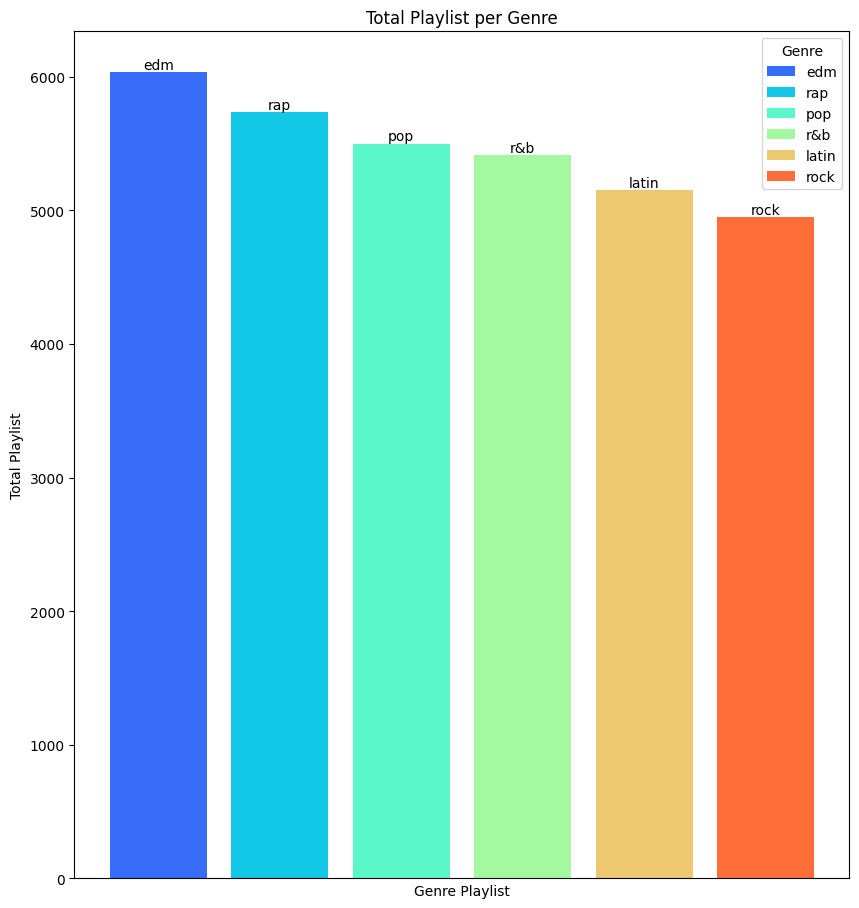

In [ ]:
# Data untuk plot
genre = populer_playlist.index
total_playlist = populer_playlist['total_playlist']

# Membuat bar plot dengan label
plt.figure(figsize=(10, 11))
x_pos = np.arange(len(genre))
bars = plt.bar(x_pos, total_playlist, color=sns.color_palette('rainbow', len(genre)))

# Menambahkan label untuk setiap bar
for bar, genre_name in zip(bars, genre):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), genre_name, ha='center', va='bottom')

plt.title('Total Playlist per Genre')
plt.xlabel('Genre Playlist')
plt.ylabel('Total Playlist')
plt.xticks([])

plt.legend(bars, genre, title='Genre')

plt.show()

Plot di atas menunjukkan bahwa genre EDM memiliki jumlah playlist terbanyak, diikuti oleh Rap dan Pop. Genre R&B, Latin, dan Rock memiliki jumlah playlist yang relatif sama, namun lebih sedikit dibandingkan dengan tiga genre teratas.

## Selanjutnya, 🤔 bagaimana dengan performa popularitas lagu disetiap tahunnya❓

In [ ]:
yearly_popularity = df.resample(rule='Y', on='track_album_release_date').agg({
    "track_id": "nunique",
    "track_popularity": "sum"
})

In [ ]:
yearly_popularity['average_popularity'] = yearly_popularity['track_popularity'] / yearly_popularity['track_id']
yearly_popularity

,track_id,track_popularity,average_popularity
track_album_release_date,,,
1957-12-31,2,60,30.000000
1958-12-31,1,73,73.000000
1959-12-31,0,0,NaN
1960-12-31,4,64,16.000000
1961-12-31,1,47,47.000000
...,...,...,...
2016-12-31,1823,81582,44.751509
2017-12-31,2147,101237,47.152771
2018-12-31,2912,151540,52.039835


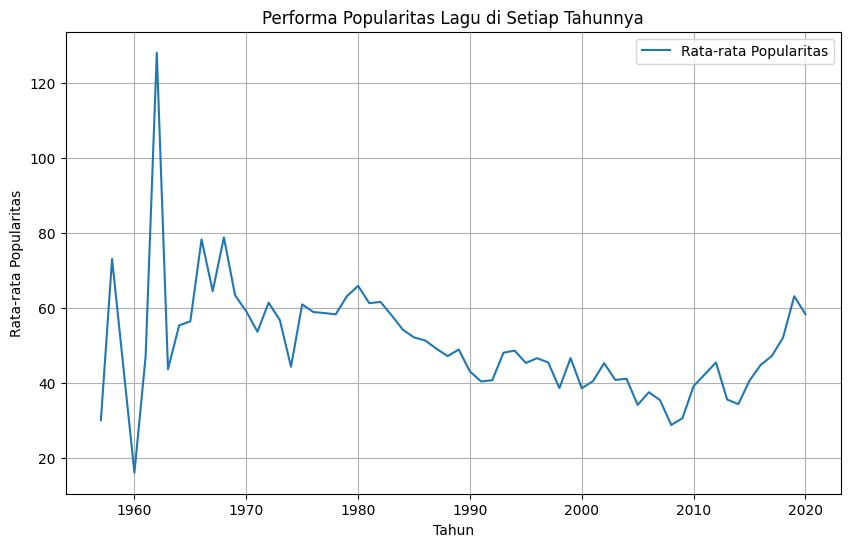

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_popularity.index.year, y='average_popularity', data=yearly_popularity, label='Rata-rata Popularitas')
plt.title('Performa Popularitas Lagu di Setiap Tahunnya')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Popularitas')
plt.grid(True)
plt.legend()

plt.show()

Kita dapat melihat berdasarkan hasil analisis dan visualisasi diatas,
Berdasarkan grafik tren popularitas lagu per tahun, terlihat adanya fluktuasi.  Meskipun tidak ada penurunan tren yang signifikan secara konsisten, terdapat periode-periode tertentu di mana rata-rata popularitas mengalami penurunan.

## 🤔 Bagaimana dengan performa popularitas lagu disetiap tahunnya untuk setiap genre❓

In [ ]:
genre_yearly_popularity = df.groupby([
    pd.Grouper(key='track_album_release_date', freq='Y'), 'playlist_genre'
])['track_popularity'].mean().reset_index()
genre_yearly_popularity

,track_album_release_date,playlist_genre,track_popularity
0,1957-12-31,r&b,59.000000
1,1957-12-31,rock,1.000000
2,1958-12-31,rock,73.000000
3,1960-12-31,r&b,16.000000
4,1961-12-31,r&b,47.000000
...,...,...,...
297,2020-12-31,latin,50.190840
298,2020-12-31,pop,47.224852
299,2020-12-31,r&b,48.483871
300,2020-12-31,rap,50.601266


In [ ]:
most_popular_genre = genre_yearly_popularity.loc[
    genre_yearly_popularity.groupby(
        pd.Grouper(key='track_album_release_date', freq='Y')
    )['track_popularity'].idxmax()
]
most_popular_genre

,track_album_release_date,playlist_genre,track_popularity
0,1957-12-31,r&b,59.000000
2,1958-12-31,rock,73.000000
0,1957-12-31,r&b,59.000000
3,1960-12-31,r&b,16.000000
4,1961-12-31,r&b,47.000000
...,...,...,...
275,2016-12-31,r&b,41.612536
280,2017-12-31,pop,48.378968
286,2018-12-31,pop,52.197724
293,2019-12-31,r&b,57.930190


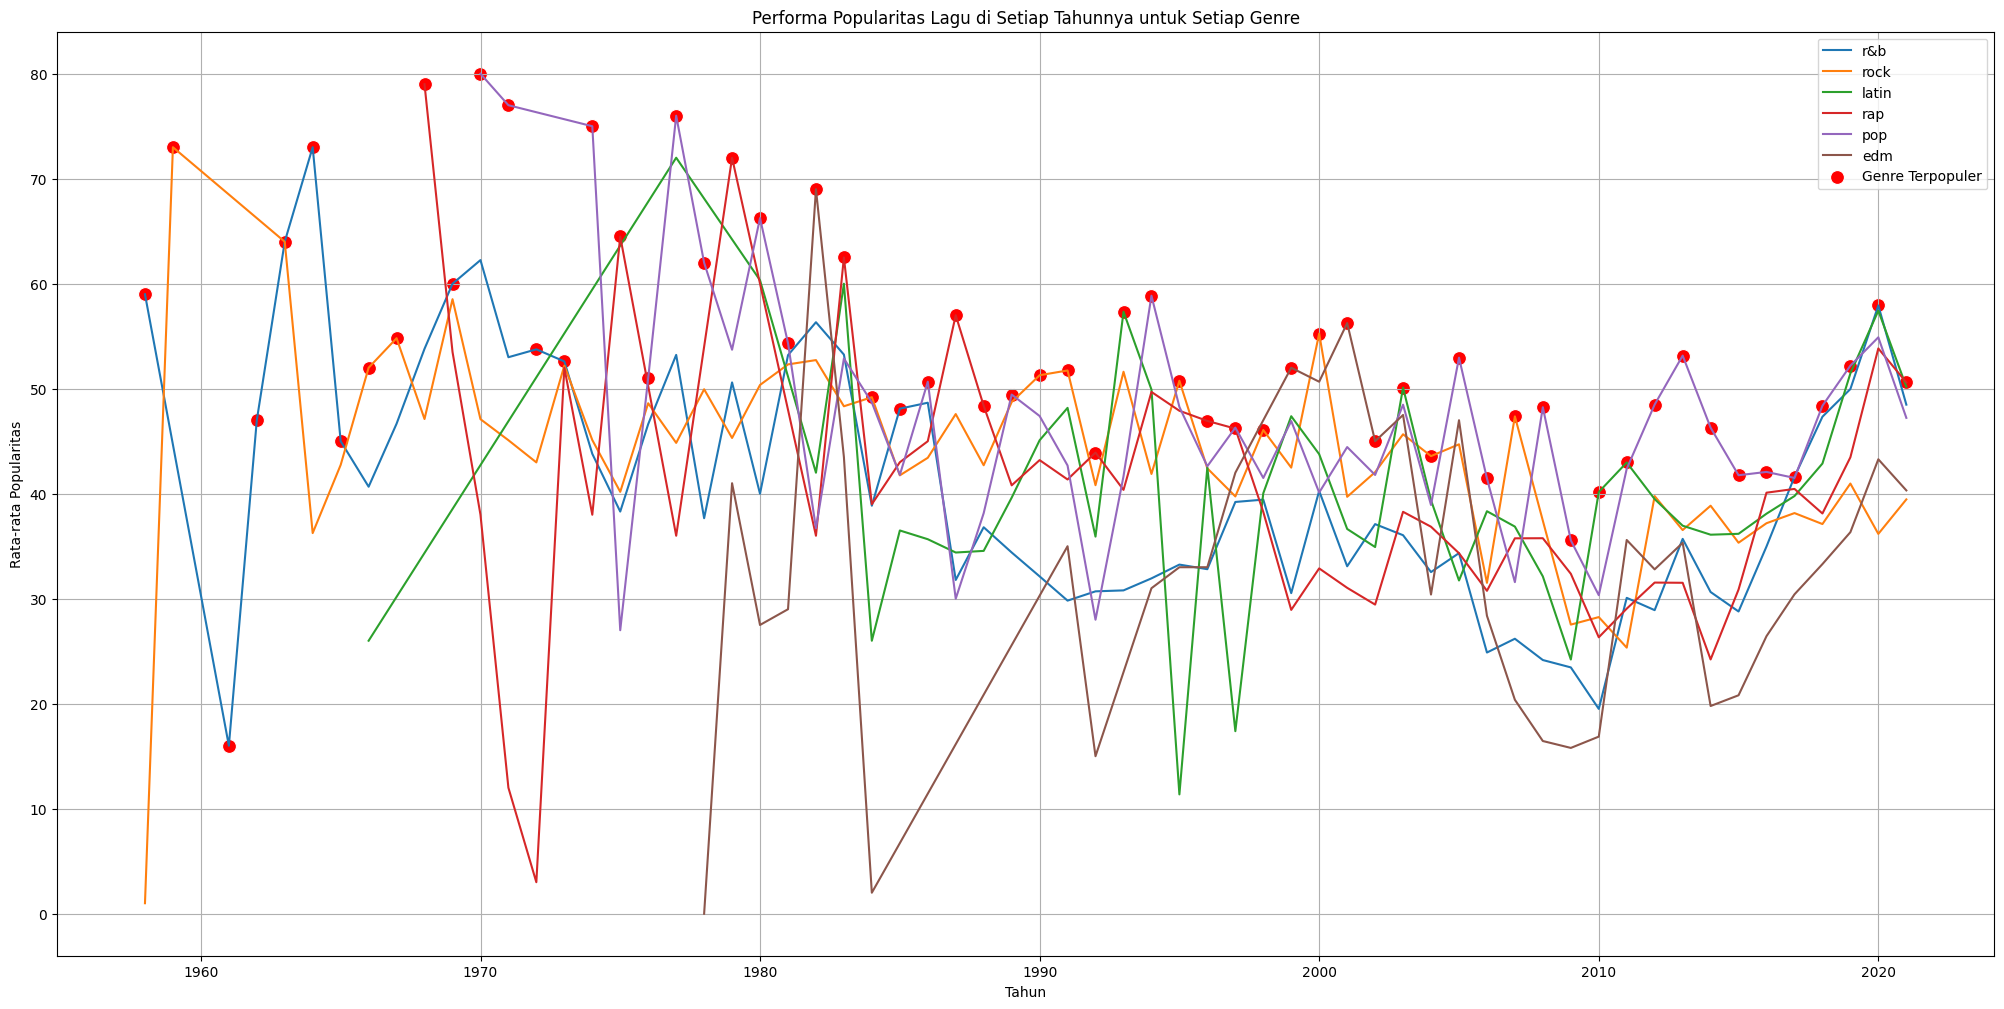

In [ ]:
plt.figure(figsize=(25, 12))

# Line plot untuk performa popularitas setiap genre
sns.lineplot(
    x='track_album_release_date',
    y='track_popularity',
    hue='playlist_genre',
    data=genre_yearly_popularity
)

# Scatter plot untuk genre terpopuler
sns.scatterplot(
    x='track_album_release_date',
    y='track_popularity',
    data=most_popular_genre,
    color='red',
    s=100,
    label='Genre Terpopuler'
)

plt.title('Performa Popularitas Lagu di Setiap Tahunnya untuk Setiap Genre')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Popularitas')
plt.grid(True)
plt.legend()
plt.show()

Dari visualisasi data diatas, dapat dilihat genre edm paling lama rilis dibanding genre lain, pada awal rilis genre edm yang paling rendah popularitasnya, sedangkan genre pop diawal rilis merupakan genre yang paling populer diantara semua genre. Serta genre pop pada awal rilis popularitasnya langsung melejit dibanding yang lain.

Dan dari tahun ke tahun grafik menunjukan pola yang semakin lama rata-rata popularitasnya memadat direntang 60-30, hal ini menunjukan bahwa dari tahun ke tahun tren musik akan semakin beragam dan kompetitif. Popularitas lagu tidak lagi didominasi oleh satu atau dua genre saja, tetapi tersebar lebih merata di berbagai genre.  Meskipun genre tertentu mungkin masih mendominasi secara keseluruhan, perbedaan popularitas antar genre cenderung berkurang seiring waktu, yang menunjukkan pasar musik yang lebih beragam.

## 🤔Genre manakah yang paling populer di 5 tahun awal dan 5 tahun terakhir❓

In [ ]:
# Urutkan data
most_popular_genre = most_popular_genre.sort_values(by='track_album_release_date')
most_popular_genre

,track_album_release_date,playlist_genre,track_popularity
0,1957-12-31,r&b,59.000000
0,1957-12-31,r&b,59.000000
2,1958-12-31,rock,73.000000
3,1960-12-31,r&b,16.000000
4,1961-12-31,r&b,47.000000
...,...,...,...
275,2016-12-31,r&b,41.612536
280,2017-12-31,pop,48.378968
286,2018-12-31,pop,52.197724
293,2019-12-31,r&b,57.930190


In [ ]:
# Filter data untuk 5 tahun awal
first_5_years = most_popular_genre.head(5)
first_5_years_genre_counts = first_5_years['playlist_genre'].value_counts()
first_5_years_genre_counts

,count
playlist_genre,
r&b,4
rock,1


In [ ]:
# Filter data untuk 5 tahun terakhir
last_5_years = most_popular_genre.tail(5)
last_5_years_genre_counts = last_5_years['playlist_genre'].value_counts()
last_5_years_genre_counts

,count
playlist_genre,
r&b,2
pop,2
rap,1


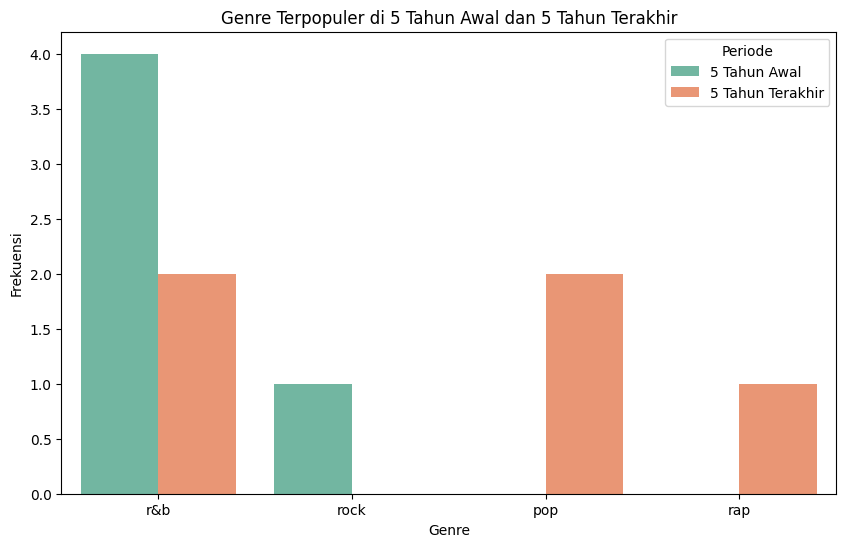

In [ ]:
# Gabungkan data genre counts menjadi DataFrame
genre_counts_df = pd.DataFrame({
    'Genre': first_5_years_genre_counts.index,
    'Frekuensi': first_5_years_genre_counts.values,
    'Periode': '5 Tahun Awal'
})
genre_counts_df = pd.concat([genre_counts_df, pd.DataFrame({
    'Genre': last_5_years_genre_counts.index,
    'Frekuensi': last_5_years_genre_counts.values,
    'Periode': '5 Tahun Terakhir'
})], ignore_index=True)

# Membuat grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Frekuensi', hue='Periode', data=genre_counts_df, palette='Set2')
plt.title('Genre Terpopuler di 5 Tahun Awal dan 5 Tahun Terakhir')
plt.xlabel('Genre')
plt.ylabel('Frekuensi')
plt.show()

Dari visualisasi data diatas dapat dilihat, genre paling populer di 5 tahun awal r&b dan di 5 tahun terakhir terdapat r&b dan pop, genre rap dan pop muncul di 5 tahun terakhir dan tidak ada di 5 tahun awal. Hal ini menandakan tentang pergeseran tren musik dari waktu ke waktu. Serta penurunan popularitas pada genre rock, dimana genre rock lebih populer di 5 tahun awal dibanding 5 tahun terakhir

## 🤔 Bagaimana fitur audio (dancebility, tempo, valensi, energi) memengaruhi popularitas lagu (track_popularity) dalam berbagai playlist_genre❓

In [ ]:
# Mengelompokkan data berdasarkan playlist_genre
genre_analysis = df.groupby('playlist_genre')[['danceability', 'tempo', 'valence', 'energy', 'track_popularity']].mean()

print(genre_analysis)


                danceability       tempo   valence    energy  track_popularity
playlist_genre                                                                
edm                 0.654969  125.776727  0.400634  0.802488         34.830048
latin               0.713336  118.640571  0.605508  0.708337         47.032433
pop                 0.639179  120.735229  0.503265  0.701037         47.747091
r&b                 0.670016  114.171935  0.530680  0.590886         41.211791
rap                 0.718402  120.671809  0.505225  0.650709         43.249608
rock                0.520549  124.993022  0.537367  0.732760         41.729091


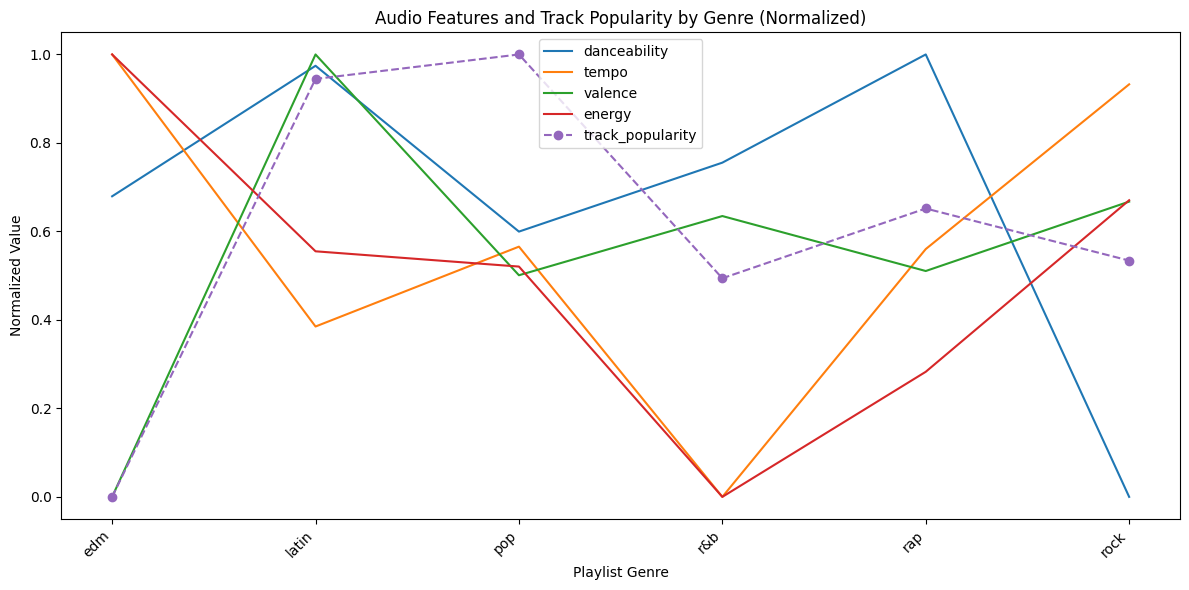

In [ ]:
scaler = MinMaxScaler()
genre_analysis_normalized = genre_analysis.copy()
features_to_normalize = ['danceability', 'tempo', 'valence', 'energy', 'track_popularity']
genre_analysis_normalized[features_to_normalize] = scaler.fit_transform(genre_analysis[features_to_normalize])


plt.figure(figsize=(12, 6))

features = ['danceability', 'tempo', 'valence', 'energy']
for feature in features:
    plt.plot(genre_analysis_normalized.index, genre_analysis_normalized[feature], label=feature)

plt.plot(genre_analysis_normalized.index, genre_analysis_normalized['track_popularity'], label='track_popularity', linestyle='--', marker='o')

plt.xlabel("Playlist Genre")
plt.ylabel("Normalized Value")
plt.title("Audio Features and Track Popularity by Genre (Normalized)")
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

1. Musik EDM cenderung memiliki energi tinggi dan tempo cepat, tetapi popularitasnya lebih rendah dibandingkan genre lain seperti latin atau pop.

2. Genre Latin memiliki tingkat danceability dan valence yang tinggi, mencerminkan karakteristik musik yang ceria dan energik. Popularitasnya cukup tinggi.

3. Musik pop memiliki popularitas tertinggi karena sifatnya yang fleksibel dan mudah diterima oleh berbagai kalangan pendengar.

4. R&B memiliki tempo lebih lambat dengan energy sedang, cocok untuk pendengar yang mencari musik yang lebih emosional dan santai.

5. Genre rap memiliki danceability tertinggi, yang menunjukkan kuatnya elemen ritme dalam genre ini, meskipun popularitasnya tidak setinggi pop atau latin.

6. Rock memiliki energi tinggi tetapi danceability rendah, menunjukkan fokusnya pada intensitas musik daripada aspek tarian.

## 🤔 Siapa artis atau album yang paling banyak dimasukkan ke playlist❓

In [ ]:
artist_counts_to_playlist = df['track_artist'].value_counts()

album_counts_to_playlist = df['track_album_name'].value_counts()

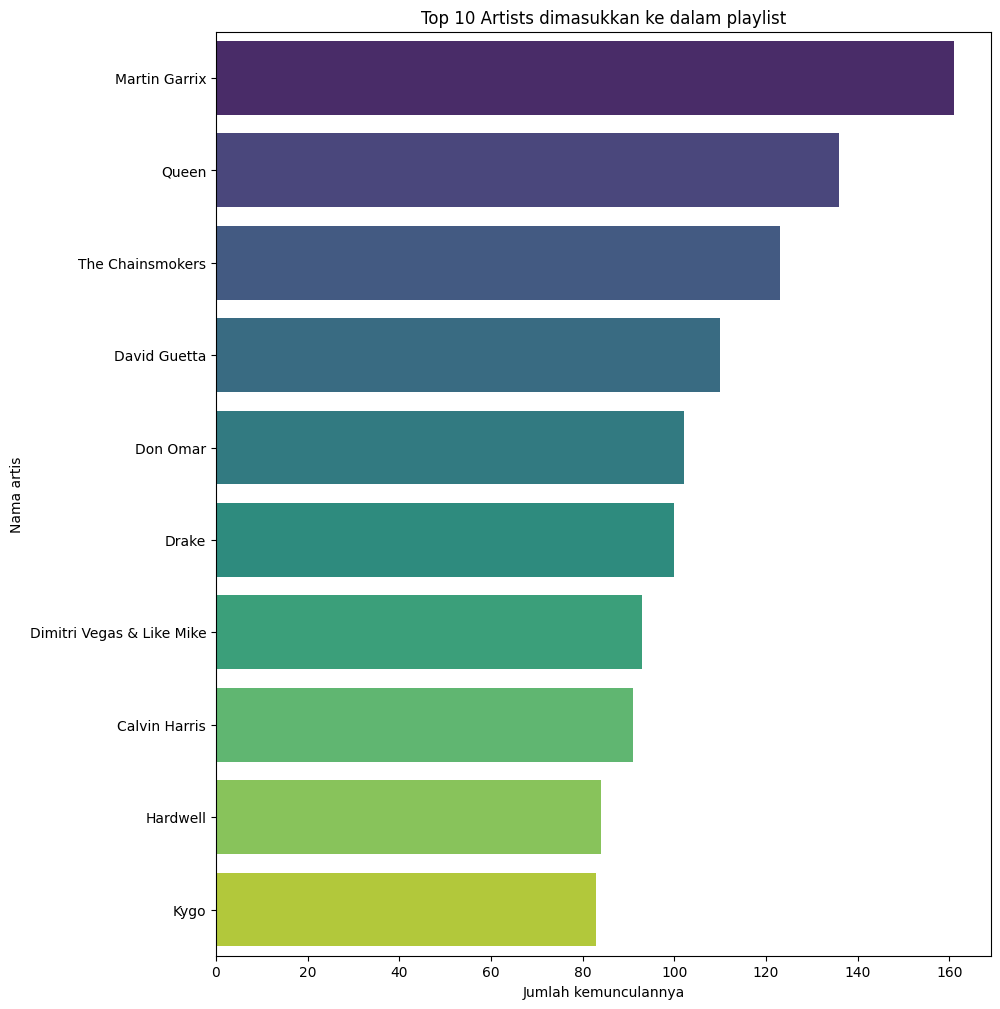

In [ ]:
fig, axes = plt.subplots(figsize=(10, 12))

sns.barplot(x=artist_counts_to_playlist.values[:10], y=artist_counts_to_playlist.index[:10], ax=axes, palette='viridis')
axes.set_title('Top 10 Artists dimasukkan ke dalam playlist')
axes.set_xlabel('Jumlah kemunculannya')
axes.set_ylabel('Nama artis')
plt.show()


Untuk artis yang paling banyak muncul di playlist, berikut adalah posisi top 10 tersebut:

1. Martin Garrix menduduki peringkat pertama dengan jumlah penampilan tertinggi, mencapai lebih dari 160 kali. Artis ini sangat populer di playlist.
2. Queen berada di posisi kedua dengan jumlah penampilan yang sangat tinggi, namun masih di bawah Martin Garrix.
3. The Chainsmokers menempati posisi ketiga dengan jumlah penampilan yang signifikan.
4. David Guetta menduduki peringkat keempat, mengikuti The Chainsmokers dengan jarak yang tipis.
5. Don Omar berada di posisi kelima dengan jumlah penampilan yang sedikit lebih rendah dari David Guetta.
6. Drake menempati peringkat keenam dengan popularitas yang masih tinggi.
7. Dimitri Vegas & Like Mike berada di posisi ketujuh.
8. Calvin Harris menyusul di posisi kedelapan.
9. Hardwell menduduki peringkat kesembilan.
10. Kygo menutup daftar dengan posisi kesepuluh.

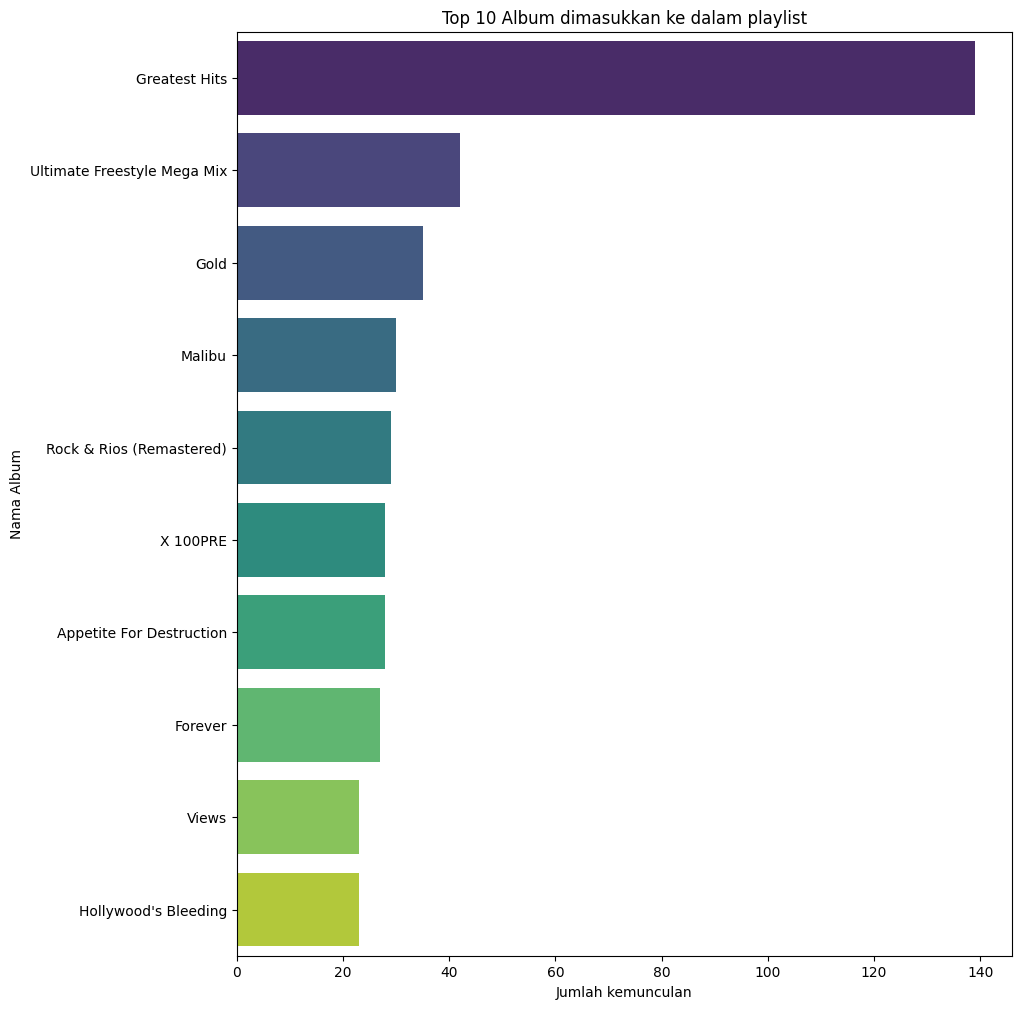

In [ ]:
fig, axes = plt.subplots(figsize=(10, 12))

# Plot artist counts
sns.barplot(x=album_counts_to_playlist.values[:10], y=album_counts_to_playlist.index[:10], ax=axes, palette='viridis') # Use axes directly
axes.set_title('Top 10 Album dimasukkan ke dalam playlist')
axes.set_xlabel('Jumlah kemunculan')
axes.set_ylabel('Nama Album')
plt.show()

Berdasarkan jumlah penampilan Album di playlist, berikut adalah posisi top 10 tersebut:

1. Greatest Hits menempati posisi pertama dengan jumlah penampilan tertinggi, mencapai lebih dari 130 kali. Album ini sangat mendominasi dibandingkan album lainnya.
2. Ultimate Freestyle Mega Mix berada di posisi kedua dengan sekitar 40 penampilan.
3. Gold menempati peringkat ketiga dengan jumlah penampilan yang sedikit lebih rendah dari posisi kedua.
4. Malibu berada di peringkat keempat dengan jumlah penampilan serupa, tetapi lebih rendah dari album "Gold".
5. Rock & Rios (Remastered) menduduki posisi kelima dengan jumlah penampilan yang cukup kompetitif.
6. X 100PRE mengikuti di posisi keenam.
7. Appetite For Destruction berada di peringkat ketujuh.
8. Forever menyusul di posisi kedelapan.
9. Views menduduki peringkat kesembilan.
10. Hollywood's Bleeding menempati posisi kesepuluh dalam daftar album yang paling sering muncul di playlist.


## 🤔 Bagaimana perilaku pengguna terhadap playlist yang mereka buat? apakah pengguna cenderung membuat playlist dengan genre yang serupa, atau apakah mereka mencampurkan berbagai genre❓

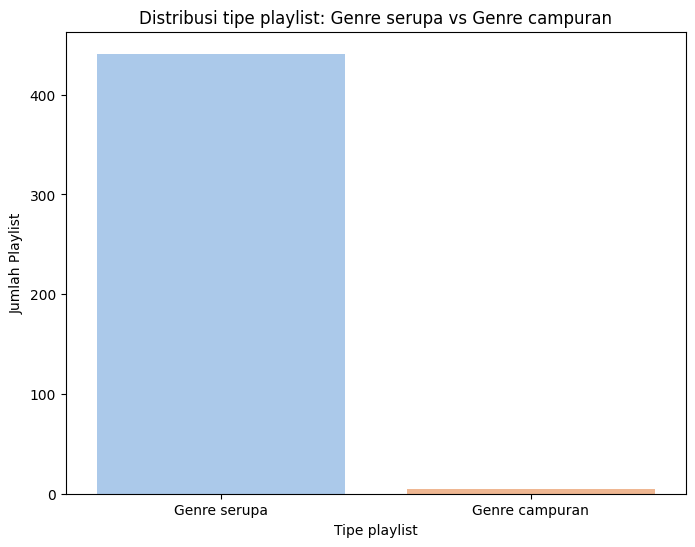


Jumlah Playlist Single Genre: 441
Jumlah Playlist Mixed Genre: 5


In [ ]:
# Menghitung jumlah genre unik dalam setiap playlist
genre_diversity = df.groupby('playlist_name')['playlist_genre'].nunique().reset_index()
genre_diversity.columns = ['playlist_name', 'unique_genres']
# Menentukan playlist dengan genre tunggal dan campuran
genre_diversity['playlist_type'] = genre_diversity['unique_genres'].apply(lambda x: 'Genre serupa' if x == 1 else 'Genre campuran')

# Menghitung jumlah playlist single genre dan mixed genre
single_genre_count = genre_diversity[genre_diversity['playlist_type'] == 'Genre serupa'].shape[0]
mixed_genre_count = genre_diversity[genre_diversity['playlist_type'] == 'Genre campuran'].shape[0]

plt.figure(figsize=(8, 6))
sns.countplot(data=genre_diversity, x='playlist_type', palette='pastel')
plt.title('Distribusi tipe playlist: Genre serupa vs Genre campuran')
plt.xlabel('Tipe playlist')
plt.ylabel('Jumlah Playlist')

plt.show()
print(f"\nJumlah Playlist Single Genre: {single_genre_count}")
print(f"Jumlah Playlist Mixed Genre: {mixed_genre_count}")

Terlihat pada hasil data dan visualisasi di atas disimpulkan bahwa playlist cenderung lebih banyak berisi genre serupa yakni dengan jumlah 441, dan untuk yang playlist berisi genre campuran hanya berjumlah 5

## 🤔 Bagaimana distribusi popularitas lagu berdasarkan tahun rilis❓

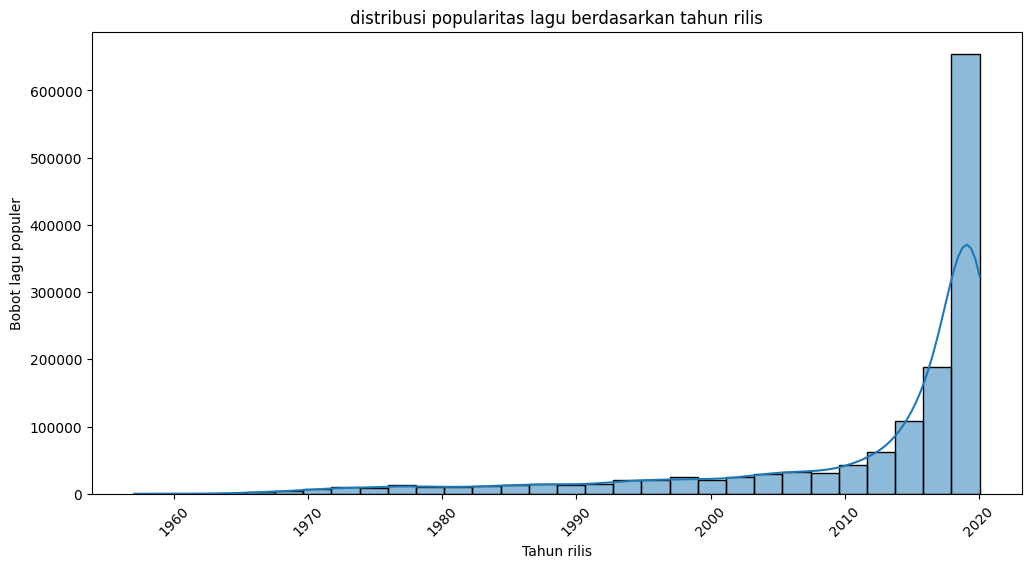

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='track_album_release_date', weights='track_popularity', bins=30, kde=True)
plt.title('distribusi popularitas lagu berdasarkan tahun rilis')
plt.xlabel('Tahun rilis')
plt.ylabel('Bobot lagu populer')
plt.xticks(rotation=45)
plt.show()

1. Tren Positif Popularitas Lagu.
Lagu dengan keluaran tahun 2010 ke atas cenderung populernya meningkat seiring dengan waktu, dan paling mendominasi pada periode 2015-2020
2. Lagu Lama Kurang Mendapat Perhatian.
Lagu Lama Kurang Mendapatkan popularitasnya terutama pada lagu keluaran sebelum tahun 2010 yang memiliki kontribusi yang lebih kecil terhadap popularitas dibandingkan lagu-lagu yang lebih baru.

# CONCLUSION ANALISIS DAN VISUALISASI DATA

## Pernyataan Masalah
Analisis ini bertujuan untuk memahami tren musik dan faktor-faktor yang memengaruhi popularitas lagu di Spotify, berdasarkan dataset lagu-lagu Spotify dari TidyTuesday. Beberapa pertanyaan yang ingin dijawab antara lain:

1. Genre playlist apa yang paling populer?
2. Bagaimana performa popularitas lagu di setiap tahunnya, baik secara umum maupun untuk setiap genre?
3. Genre apa yang paling populer di 5 tahun awal dan 5 tahun terakhir?
4. Bagaimana fitur audio (danceability, tempo, valence, energy) memengaruhi popularitas lagu di berbagai genre?
5. Siapa artis atau album yang paling banyak dimasukkan ke playlist?
6. Bagaimana perilaku pengguna dalam membuat playlist (genre serupa vs. genre campuran)?
7. Bagaimana distribusi popularitas lagu berdasarkan tahun rilis?

## Metodologi
Data: Dataset lagu-lagu Spotify dari TidyTuesday, yang berisi informasi tentang 32.780 lagu, meliputi nama lagu, artis, album, playlist, genre, dan fitur audio.

Metodologi: Analisis dilakukan dengan menggunakan bahasa pemrograman Python dan library seperti Pandas, Seaborn, dan Matplotlib. Tahapan analisis meliputi:

- **Import Library**: Memuat library yang diperlukan untuk analisis, seperti Pandas untuk manipulasi data, Seaborn dan Matplotlib untuk visualisasi, dan MinMaxScaler untuk normalisasi data
- **Gathering Data**: Mengumpulkan atau memuat data lagu-lagu Spotify dari TidyTuesday melalui GitHub
- **Assesing Data**: Menilai kualitas data dengan memeriksa missing values, tipe data, duplikat data, data yang tidak akurat, dan outlier
- **Data Cleaning**: Membersihkan data dari missing values, kesalahan tipe data, dan data yang tidak akurat.
- **Exploratory Data Analysis (EDA)**: Menjelajahi data dengan visualisasi dan statistik deskriptif untuk mengidentifikasi pola dan tren.
- **Analisis**: Menganalisis data untuk menjawab pertanyaan penelitian.


## Wawasan Menarik
1. **Genre EDM paling populer dalam hal jumlah playlist**, namun popularitas lagu-lagunya lebih rendah dibanding genre lain seperti Pop dan Latin.
2. **Popularitas lagu cenderung menurun seiring waktu**, menunjukkan persaingan yang semakin ketat di industri musik.
3. **Genre Pop dan R&B tetap populer** di awal dan akhir periode pengamatan, sedangkan genre Rap dan Latin semakin populer di tahun-tahun terakhir.
4. **Fitur audio seperti danceability, energy, dan valence** memiliki pengaruh yang berbeda terhadap popularitas lagu di berbagai genre.
5. **Martin Garrix dan Queen** adalah artis yang paling banyak muncul di playlist, sedangkan Greatest Hits dan Ultimate Freestyle Mega Mix adalah album yang paling banyak muncul.
6. **Pengguna cenderung membuat playlist dengan genre yang serupa** daripada mencampur berbagai genre.
7. **Lagu yang dirilis setelah tahun 2010 cenderung lebih populer** dibandingkan lagu-lagu yang lebih lama.

## Implikasi bagi Konsumen
1. Genre Pop tetap menjadi pilihan populer bagi konsumen yang mencari musik yang mudah didengarkan.
2. Genre Latin semakin diminati, dan konsumen mungkin ingin mengeksplorasi genre ini lebih jauh.
3. Fitur audio dapat menjadi pertimbangan bagi konsumen dalam memilih lagu, tergantung preferensi mereka.
4. Artis dan album yang sering muncul di playlist dapat menjadi indikator popularitas dan kualitas bagi konsumen.
5. Konsumen dapat membuat playlist dengan genre serupa sesuai preferensi mereka.

## Keterbatasan dan Pengembangan
- Dataset terbatas pada lagu-lagu di Spotify, dan tidak mewakili seluruh industri musik.
- Analisis tidak mempertimbangkan faktor-faktor lain yang dapat memengaruhi popularitas lagu, seperti pemasaran dan promosi.
- Analisis dapat dikembangkan dengan menggunakan dataset yang lebih besar dan mencakup data dari platform musik lain.
- Pemodelan prediktif dapat digunakan untuk memprediksi popularitas lagu di masa depan.